# HOME EQUITY LOAN

## MODEL OPTIMATION

### Ramzy Mohammad

**Dataset:** Home Equity Loan Dataset | **Source:** http://www.creditriskanalytics.net/datasets-private2.html


The data set HMEQ reports characteristics and delinquency information for 5,960 home equity loans. A home equity loan is a loan where the obligor uses the equity of his or her home as the underlying collateral. The data set has the following characteristics:<br>
<br>
<br>
◾ BAD: 1 = applicant defaulted on loan or seriously delinquent; 0 = applicant paid loan <br>
◾ LOAN: Amount of the loan request <br>
◾ MORTDUE: Amount due on existing mortgage <br>
◾ VALUE: Value of current property <br>
◾ REASON: DebtCon = debt consolidation; HomeImp = home improvement <br>
◾ JOB: Occupational categories <br>
◾ YOJ: Years at present job <br>
◾ DEROG: Number of major derogatory reports <br>
◾ DELINQ: Number of delinquent credit lines <br>
◾ CLAGE: Age of oldest credit line in months <br>
◾ NINQ: Number of recent credit inquiries <br>
◾ CLNO: Number of credit lines <br>
◾ DEBTINC: Debt-to-income ratio

 **Home Equity Loan** - adalah pinjaman di mana peminjam menggunakan ekuitas rumah mereka sebagai jaminan. Pinjaman ini memungkinkan Anda untuk meminjam sejumlah besar uang tunai berdasarkan nilai rumah Anda, yang ditentukan oleh penilai, dan ekuitas Anda saat ini.

Pinjaman ekuitas tersedia sebagai pinjaman dengan suku bunga tetap atau yang dapat disesuaikan dan datang dengan jumlah waktu tertentu untuk melunasi hutang, biasanya antara 5 dan 30 tahun. Anda akan membayar biaya penutupan, tetapi itu akan jauh lebih sedikit daripada apa yang Anda bayar pada hipotek penuh khas. HEL dengan suku bunga tetap juga menawarkan prediksi suku bunga reguler sejak awal, yang disukai beberapa peminjam.



# IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost.sklearn import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import category_encoders as ce

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

from scipy.stats import mannwhitneyu

import pingouin as pg

from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, plot_confusion_matrix, plot_roc_curve, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt


C:\Users\ASUS\Anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.3.10.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


# LOAD DATA

In [4]:
df = pd.read_csv('hmeq.csv')

In [5]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [4]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


# IMBALANCE CHECK

In [5]:
df.BAD.value_counts()

0    4771
1    1189
Name: BAD, dtype: int64

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BAD', ylabel='count'>

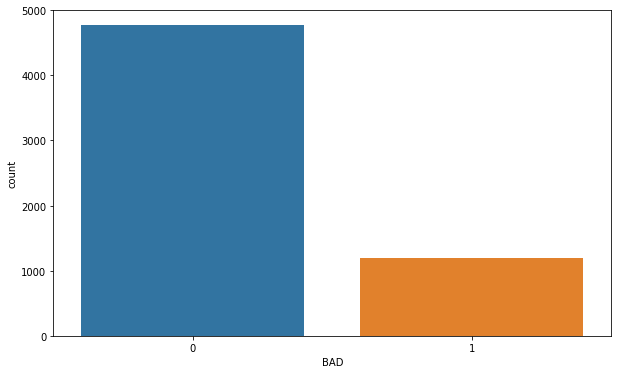

In [6]:
fig, ((ax1)) = plt.subplots(1, 1, figsize=(10,6))

sns.countplot(df['BAD'])

Berdasarkan Countplot di atas, terlihat bahwa variabel dependen/target terjadi Imbalance data.

pada saat modeling akan dilakukan resampling: <br>
1. RUS
2. ROS
3. SMOTE

Resampling tersebut bertujuan untuk memperbaiki data yang Imblance, sekaligus untuk dianalisa apakah resampling dapat meningkatkan skor model kita.

# MULTICOLINEARITY CHECK

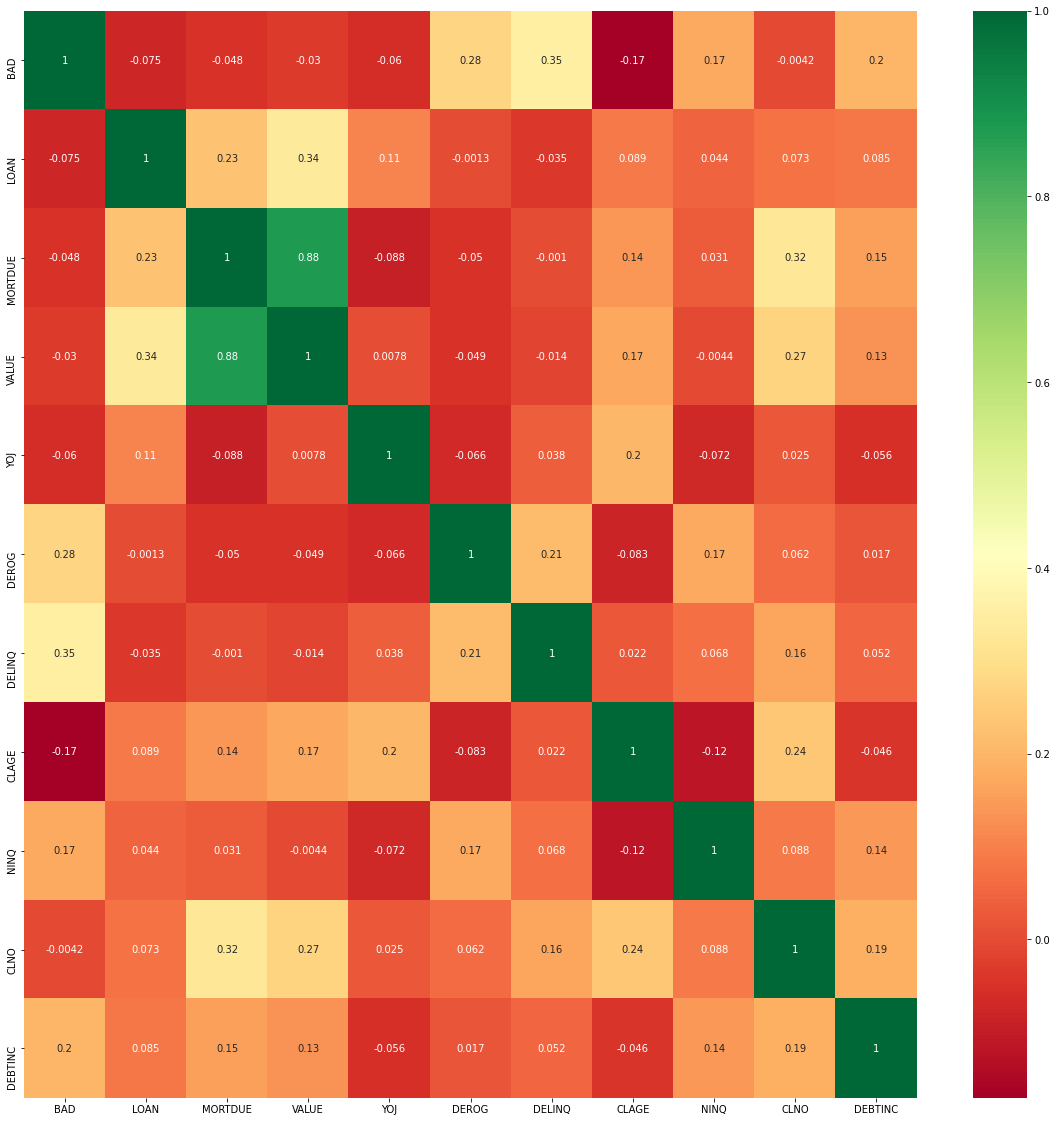

In [7]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder  
k=15  
data = df
labelencoder1_corr = LabelEncoder().fit(data.iloc[:,0])  
data.iloc[:,0] = labelencoder1_corr.transform(data.iloc[:,0])                     
corrmat = data.corr()    
top_corr_features = corrmat.index      
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Berdasarkan Heatmap di atas, terlihat ada fitur-fitur yang saling berkorelasi yaitu fitur VALUE dan MORTDUE

# SPLITTING DATA

Pada langkah ini data akan dibagi menjadi dua, yaitu data test dan data training. Data train akan digunakan untuk melatih model, sedangkan data test digunakan untuk mengevaluasi model yang telah dilatih.

## MISSING VALUE CHECK

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [9]:
X = df.drop('BAD', axis=1)
y = df['BAD']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=2021) #check random_state

In [10]:
X_train_val, x_test, y_train_val, y_test= train_test_split(X,y,stratify=y, random_state=2021, test_size=0.2)

# Strategi Encoding

Fitur-fitur bertipe data objek akan dilakukan encoding, terdapat 2 fitur yaitu: REASON dan JOB.<br>
    
Sebelum diputuskan strategi encoding, terlebih dahulu akan dilihat unique value dari fitur REASON dan JOB.

In [11]:
print(df.REASON.value_counts())
print()
print(df.JOB.value_counts())

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64


Ternyata kedua memiliki kelas yang terbilang sedikit.<br>

Sehingga kedua fitur akan dilakukan onehot encoding

# MODELLING

Kasus HOME EQUITY LOAN termasuk klasifikasi, oleh karena itu akan digunakan beberapa model klasifikasi, yaitu: 
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- KNN Classifier
- Voting Classifier
- Ada Boost
- Gradient Boost



Langkah-langkah dalam mendapatkan model terbaik:
1. Membuat banchmark dengan Resampling ROS, RUS, dan SMOTE pada masing-masing algoritma
2. Mencari nilai cross validation yang paling tinggi di masing-masing algoritma
3. Melakukan Hyperparameter pada algotirma yang telah dipilih melalui cross validation
4. Mencari algoritma terbaik melalui nilai skor yang paling tinggi dari algotritma yang telah dituning
5. Mencoba mencari Threshold terbaik
6. Menyimpan model terbaik

# EVALUATION SCORE

Pada kasus klasifikasi biasanya akurasi digunakan untuk matriks evaluasi, akan tetapi ketika data variabel target memiliki biner kelas yang tidak seimbang jumlahnya, maka akurasi kurang cocok untuk digunakan. Sebagai alternatifnya terdapat beberapa matriks evalusi yang dapat menjadi solusi bagi data target yang tidak seimbang, yaitu:<br>

1. F1 score 
2. Recall 
3. Precision


Pada kasus ini tujuannya adalah mengidentifikasi dan menyeleksi secara cepat, akurat, serta tepat pemohon mana saja yang layak diberi pinjaman sehingga  meminimalisir kerugian perusahaan karena adanya salah identifikasi dengan memberi pinjaman kepada yang tidak layak, maka yang menjadi fokus adalah mengecilkan peluang lolosnya pemohon yang tidak layak diberi pinjaman. Oleh karena itu matriks evaluasi yang tepat digunakan adalah Recall.

In [12]:
logit = LogisticRegression(random_state=2021)
rfc = RandomForestClassifier(random_state=101)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=101)
smote = SMOTE(random_state=101)
rus = RandomUnderSampler(random_state=101)
ros = RandomOverSampler(random_state=101)
tree = DecisionTreeClassifier(random_state=101)

#  1.MODELING-BENCHMARK-RESAMPLING

## 1.1 RANDOM FOREST - BENCHMARK-SMOTE

In [15]:
rfc = RandomForestClassifier(random_state=101)

In [16]:
rfc_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan))
])

# for all object columns
rfc_pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('onehot', OneHotEncoder(drop='first'))
])

# transforming all columns
rfc_transformer = ColumnTransformer([
    ('pipe_num', rfc_pipe_num, ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']),
    ('pipe_cat', rfc_pipe_cat, ['REASON', 'JOB']),
], remainder='passthrough')

rfc_pipe_combine_bench_smote = Pipeline([
    ('transformer', rfc_transformer),
    ('rfe', RFE(rfc)),
    ('resampling', smote),
    ('rfc', rfc)
])

In [17]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

rfc_benchmark_smote_score = cross_val_score(rfc_pipe_combine_bench_smote, X_train_val, y_train_val, scoring='recall', cv=skf, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.2s finished


In [18]:
print('Random forest classifier Val Score:', rfc_benchmark_smote_score.mean())

Random forest classifier Val Score: 0.7644860843207495


In [19]:
rf_benchmark_smote = rfc_pipe_combine_bench_smote.fit(X_train_val, y_train_val)

In [20]:
rf_benchmark_smote

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['LOAN', 'MORTDUE', 'VALUE',
                                                   'YOJ', 'DEROG', 'DELINQ',
                                                   'CLAGE', 'NINQ', 'CLNO',
                                                   'DEBTINC']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                          

In [21]:
rf_benchmark_smote_pred = rf_benchmark_smote.predict(X_test)
rf_benchmark_smote_proba = rf_benchmark_smote.predict_proba(X_test)

In [22]:
print(classification_report(y_test, rf_benchmark_smote_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       954
           1       0.78      0.80      0.79       238

    accuracy                           0.92      1192
   macro avg       0.87      0.87      0.87      1192
weighted avg       0.92      0.92      0.92      1192



## 1.2 RANDOM FOREST-BENCHMARK-ROS

In [23]:
rfc = RandomForestClassifier(random_state=101)

In [24]:
rfc_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan))
])

# for all object columns
rfc_pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('onehot', OneHotEncoder(drop='first'))
])

# transforming all columns
rfc_transformer = ColumnTransformer([
    ('pipe_num', rfc_pipe_num, ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']),
    ('pipe_cat', rfc_pipe_cat, ['REASON', 'JOB']),
], remainder='passthrough')

rfc_pipe_combine_bench_ros = Pipeline([
    ('transformer', rfc_transformer),
    ('rfe', RFE(rfc)),
    ('resampling', ros),
    ('rfc', rfc)
])

In [25]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

rfc_benchmark_ros_score = cross_val_score(rfc_pipe_combine_bench_ros, X_train_val, y_train_val, scoring='recall', cv=skf, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.3s finished


In [26]:
print('Random forest classifier Val Score:', rfc_benchmark_ros_score.mean())

Random forest classifier Val Score: 0.7140093689721686


In [27]:
rf_benchmark_ros = rfc_pipe_combine_bench_ros.fit(X_train_val, y_train_val)

In [28]:
rf_benchmark_ros

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['LOAN', 'MORTDUE', 'VALUE',
                                                   'YOJ', 'DEROG', 'DELINQ',
                                                   'CLAGE', 'NINQ', 'CLNO',
                                                   'DEBTINC']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                          

In [29]:
rf_benchmark_ros_pred = rf_benchmark_ros.predict(X_test)
rf_benchmark_ros_proba = rf_benchmark_ros.predict_proba(X_test)

In [30]:
print(classification_report(y_test, rf_benchmark_ros_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       954
           1       0.82      0.68      0.75       238

    accuracy                           0.91      1192
   macro avg       0.87      0.82      0.84      1192
weighted avg       0.90      0.91      0.90      1192



## 1.3 RANDOM FOREST-BENCHMARK-RUS

In [31]:
rfc = RandomForestClassifier(random_state=101)

In [32]:
rfc_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan))
])

# for all object columns
rfc_pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('onehot', OneHotEncoder(drop='first'))
])

# transforming all columns
rfc_transformer = ColumnTransformer([
    ('pipe_num', rfc_pipe_num, ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']),
    ('pipe_cat', rfc_pipe_cat, ['REASON', 'JOB']),
], remainder='passthrough')

rfc_pipe_combine_bench_rus = Pipeline([
    ('transformer', rfc_transformer),
    ('rfe', RFE(rfc)),
    ('resampling', rus),
    ('rfc', rfc)
])

In [33]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

rfc_benchmark_rus_score = cross_val_score(rfc_pipe_combine_bench_rus, X_train_val, y_train_val, scoring='recall', cv=skf, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.8s finished


In [34]:
print('Random forest classifier Val Score:', rfc_benchmark_rus_score.mean())

Random forest classifier Val Score: 0.8475613116561036


In [35]:
rf_benchmark_rus = rfc_pipe_combine_bench_rus.fit(X_train_val, y_train_val)

In [36]:
rf_benchmark_rus

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['LOAN', 'MORTDUE', 'VALUE',
                                                   'YOJ', 'DEROG', 'DELINQ',
                                                   'CLAGE', 'NINQ', 'CLNO',
                                                   'DEBTINC']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                          

In [37]:
rf_benchmark_rus_pred = rf_benchmark_rus.predict(X_test)
rf_benchmark_rus_proba = rf_benchmark_rus.predict_proba(X_test)

In [38]:
print(classification_report(y_test, rf_benchmark_ros_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       954
           1       0.82      0.68      0.75       238

    accuracy                           0.91      1192
   macro avg       0.87      0.82      0.84      1192
weighted avg       0.90      0.91      0.90      1192



## 1.4 KNN - BENCHMARK-RESAMPLING SMOTE

In [39]:
knn = KNeighborsClassifier()

In [40]:
knn_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', StandardScaler())
])

# for all object columns
knn_pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('onehot', OneHotEncoder(drop='first'))
])

# transforming all columns
knn_transformer = ColumnTransformer([
    ('pipe_num', knn_pipe_num, ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']),
    ('pipe_cat', knn_pipe_cat, ['REASON', 'JOB'])
])

# combine all pipeline
knn_pipe_combine_bench_smote = Pipeline([
    ('transformer', knn_transformer),
    ('resampling', smote),
    ('knn', knn)
])

In [41]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

knn_benchmark_smote_score = cross_val_score(knn_pipe_combine_bench_smote, X_train_val, y_train_val, scoring='recall', cv=skf, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [42]:
print('knn Val Score:', knn_benchmark_smote_score.mean())

knn Val Score: 0.769738219895288


In [43]:
knn_benchmark_smote = knn_pipe_combine_bench_smote.fit(X_train_val, y_train_val)

In [44]:
knn_benchmark_smote

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LOAN', 'MORTDUE', 'VALUE',
                                                   'YOJ', 'DEROG', 'DELINQ',
                                                   'CLAGE', 'NINQ', 'CLNO',
                                                   'DEBTINC']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                

In [45]:
knn_benchmark_smote_pred = knn_benchmark_smote.predict(X_test)
knn_benchmark_smote_proba = knn_benchmark_smote.predict_proba(X_test)

In [47]:
print(classification_report(y_test, knn_benchmark_smote_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       954
           1       0.93      0.78      0.85       238

    accuracy                           0.94      1192
   macro avg       0.94      0.88      0.91      1192
weighted avg       0.94      0.94      0.94      1192



## 1.5 KNN - BENCHMARK-RESAMPLING-ROS

In [48]:
knn = KNeighborsClassifier()

In [49]:
knn_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', StandardScaler())
])

# for all object columns
knn_pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('onehot', OneHotEncoder(drop='first'))
])

# transforming all columns
knn_transformer = ColumnTransformer([
    ('pipe_num', knn_pipe_num, ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']),
    ('pipe_cat', knn_pipe_cat, ['REASON', 'JOB'])
])

# combine all pipeline
knn_pipe_combine_bench_ros = Pipeline([
    ('transformer', knn_transformer),
    ('resampling', ros),
    ('knn', knn)
])

In [50]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

knn_benchmark_ros_score = cross_val_score(knn_pipe_combine_bench_ros, X_train_val, y_train_val, scoring='recall', cv=skf, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [51]:
print('knn Val Score:', knn_benchmark_ros_score.mean())

knn Val Score: 0.74027555800496


In [52]:
knn_benchmark_ros = knn_pipe_combine_bench_ros.fit(X_train_val, y_train_val)

In [53]:
knn_benchmark_ros

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LOAN', 'MORTDUE', 'VALUE',
                                                   'YOJ', 'DEROG', 'DELINQ',
                                                   'CLAGE', 'NINQ', 'CLNO',
                                                   'DEBTINC']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                

In [54]:
knn_benchmark_ros_pred = knn_benchmark_ros.predict(X_test)
knn_benchmark_ros_proba = knn_benchmark_ros.predict_proba(X_test)

In [55]:
print(classification_report(y_test, knn_benchmark_ros_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       954
           1       0.94      0.79      0.86       238

    accuracy                           0.95      1192
   macro avg       0.95      0.89      0.91      1192
weighted avg       0.95      0.95      0.95      1192



# 1.6 KNN - BENCHMARK-RESAMPLING-RUS

In [56]:
knn = KNeighborsClassifier()

In [57]:
knn_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', StandardScaler())
])

# for all object columns
knn_pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('onehot', OneHotEncoder(drop='first'))
])

# transforming all columns
knn_transformer = ColumnTransformer([
    ('pipe_num', knn_pipe_num, ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']),
    ('pipe_cat', knn_pipe_cat, ['REASON', 'JOB'])
])

# combine all pipeline
knn_pipe_combine_bench_rus = Pipeline([
    ('transformer', knn_transformer),
    ('resampling', rus),
    ('knn', knn)
])

In [58]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

knn_benchmark_rus_score = cross_val_score(knn_pipe_combine_bench_rus, X_train_val, y_train_val, scoring='recall', cv=skf, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [59]:
print('knn Val Score:', knn_benchmark_rus_score.mean())

knn Val Score: 0.7192559933866078


In [60]:
knn_benchmark_rus = knn_pipe_combine_bench_rus.fit(X_train_val, y_train_val)

In [61]:
knn_benchmark_rus

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LOAN', 'MORTDUE', 'VALUE',
                                                   'YOJ', 'DEROG', 'DELINQ',
                                                   'CLAGE', 'NINQ', 'CLNO',
                                                   'DEBTINC']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                

In [62]:
knn_benchmark_rus_pred = knn_benchmark_rus.predict(X_test)
knn_benchmark_rus_proba = knn_benchmark_rus.predict_proba(X_test)

In [63]:
print(classification_report(y_test, knn_benchmark_rus_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       954
           1       0.56      0.71      0.63       238

    accuracy                           0.83      1192
   macro avg       0.74      0.79      0.76      1192
weighted avg       0.85      0.83      0.84      1192



## 1.7 TREE - BENCHMARK-SMOTE

In [64]:
tree = DecisionTreeClassifier(random_state=101)

In [65]:
tree_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan))
])

# for all object columns
tree_pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('onehot', OneHotEncoder(drop='first'))
])

# transforming all columns
tree_transformer = ColumnTransformer([
    ('pipe_num', tree_pipe_num, ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']),
    ('pipe_cat', tree_pipe_cat, ['REASON', 'JOB'])
])

# combine all pipeline
tree_pipe_combine_bench_smote = Pipeline([
    ('transformer', tree_transformer),
    ('rfe', RFE(tree)),
    ('resampling', smote),
    ('tree', tree)
])

In [66]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

tree_benchmark_smote_score = cross_val_score(tree_pipe_combine_bench_smote, X_train_val, y_train_val, scoring='recall', cv=skf, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


In [67]:
print('tree Val Score:', tree_benchmark_smote_score.mean()) 

tree Val Score: 0.6687572333976302


In [68]:
tree_benchmark_smote = tree_pipe_combine_bench_smote.fit(X_train_val, y_train_val)

In [69]:
tree_benchmark_smote

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['LOAN', 'MORTDUE', 'VALUE',
                                                   'YOJ', 'DEROG', 'DELINQ',
                                                   'CLAGE', 'NINQ', 'CLNO',
                                                   'DEBTINC']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
   

In [70]:
tree_benchmark_smote_pred = tree_benchmark_smote.predict(X_test)
tree_benchmark_smote_proba = tree_benchmark_smote.predict_proba(X_test)

In [71]:
print(classification_report(y_test, tree_benchmark_smote_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       954
           1       0.62      0.70      0.66       238

    accuracy                           0.85      1192
   macro avg       0.77      0.80      0.78      1192
weighted avg       0.86      0.85      0.86      1192



## 1.8 TREE - BENCHMARK-ROS

In [72]:
tree = DecisionTreeClassifier(random_state=101)

In [73]:
tree_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan))
])

# for all object columns
tree_pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('onehot', OneHotEncoder(drop='first'))
])

# transforming all columns
tree_transformer = ColumnTransformer([
    ('pipe_num', tree_pipe_num, ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']),
    ('pipe_cat', tree_pipe_cat, ['REASON', 'JOB'])
])

# combine all pipeline
tree_pipe_combine_bench_ros = Pipeline([
    ('transformer', tree_transformer),
    ('rfe', RFE(tree)),
    ('resampling', ros),
    ('tree', tree)
])

In [74]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

tree_benchmark_ros_score = cross_val_score(tree_pipe_combine_bench_ros, X_train_val, y_train_val, scoring='recall', cv=skf, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


In [75]:
print('tree Val Score:', tree_benchmark_ros_score.mean()) 

tree Val Score: 0.6078423808211628


In [76]:
tree_benchmark_ros = tree_pipe_combine_bench_ros.fit(X_train_val, y_train_val)

In [77]:
tree_benchmark_ros

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['LOAN', 'MORTDUE', 'VALUE',
                                                   'YOJ', 'DEROG', 'DELINQ',
                                                   'CLAGE', 'NINQ', 'CLNO',
                                                   'DEBTINC']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
   

In [78]:
tree_benchmark_ros_pred = tree_benchmark_ros.predict(X_test)
tree_benchmark_ros_proba = tree_benchmark_ros.predict_proba(X_test)

In [79]:
print(classification_report(y_test, tree_benchmark_ros_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       954
           1       0.65      0.54      0.59       238

    accuracy                           0.85      1192
   macro avg       0.77      0.73      0.75      1192
weighted avg       0.84      0.85      0.84      1192



## 1.9 TREE - BENCHMARK-RUS

In [80]:
tree = DecisionTreeClassifier(random_state=101)

In [81]:
tree_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan))
])

# for all object columns
tree_pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('onehot', OneHotEncoder(drop='first'))
])

# transforming all columns
tree_transformer = ColumnTransformer([
    ('pipe_num', tree_pipe_num, ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']),
    ('pipe_cat', tree_pipe_cat, ['REASON', 'JOB'])
])

# combine all pipeline
tree_pipe_combine_bench_rus = Pipeline([
    ('transformer', tree_transformer),
    ('rfe', RFE(tree)),
    ('resampling', rus),
    ('tree', tree)
])

In [82]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

tree_benchmark_rus_score = cross_val_score(tree_pipe_combine_bench_rus, X_train_val, y_train_val, scoring='recall', cv=skf, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


In [83]:
print('tree Val Score:', tree_benchmark_rus_score.mean()) 

tree Val Score: 0.8065031689170571


In [84]:
tree_benchmark_rus = tree_pipe_combine_bench_rus.fit(X_train_val, y_train_val)

In [85]:
tree_benchmark_rus

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['LOAN', 'MORTDUE', 'VALUE',
                                                   'YOJ', 'DEROG', 'DELINQ',
                                                   'CLAGE', 'NINQ', 'CLNO',
                                                   'DEBTINC']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
   

In [86]:
tree_benchmark_rus_pred = tree_benchmark_rus.predict(X_test)
tree_benchmark_rus_proba = tree_benchmark_rus.predict_proba(X_test)

In [87]:
print(classification_report(y_test, tree_benchmark_rus_pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       954
           1       0.48      0.71      0.58       238

    accuracy                           0.79      1192
   macro avg       0.70      0.76      0.72      1192
weighted avg       0.83      0.79      0.80      1192



## 1.10 LOGISTIC REGRESSION-BENCMARK-SMOTE

In [88]:
logit = LogisticRegression(random_state=101)

In [89]:
# for monthly and total charges
logit_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', StandardScaler())
])

# for all object columns
logit_pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('onehot', OneHotEncoder(drop='first'))
])

# transforming all columns
logit_transformer = ColumnTransformer([
    ('pipe_num', logit_pipe_num, ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']),
    ('pipe_cat', logit_pipe_cat, ['REASON', 'JOB']),
], remainder='passthrough')

# combine all pipeline
logit_pipe_combine_bench_smote = Pipeline([
    ('transformer', logit_transformer),
    ('rfe', RFE(logit)),
    ('resampling', smote),
    ('logit', logit)
])

In [90]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

logit_benchmark_smote_score = cross_val_score(logit_pipe_combine_bench_smote, X_train_val, y_train_val, scoring='recall', cv=skf, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


In [91]:
print('logit Val Score:', logit_benchmark_smote_score.mean())

logit Val Score: 0.6403692477266464


In [92]:
logit_benchmark_smote = logit_pipe_combine_bench_smote.fit(X_train_val, y_train_val)

In [93]:
logit_benchmark_smote

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LOAN', 'MORTDUE', 'VALUE',
                                                   'YOJ', 'DEROG', 'DELINQ',
                                                   'CLAGE', 'NINQ', 'CLNO',
                                                   'DEBTINC']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('imputer',
                                                                 

In [94]:
logit_benchmark_smote_pred = logit_benchmark_smote.predict(X_test)
logit_benchmark_smote_proba = logit_benchmark_smote.predict_proba(X_test)

In [95]:
print(classification_report(y_test, logit_benchmark_smote_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       954
           1       0.40      0.61      0.49       238

    accuracy                           0.74      1192
   macro avg       0.64      0.69      0.66      1192
weighted avg       0.79      0.74      0.76      1192



## 1.11 LOGISTIC REGRESSION-BENCHMARK-ROS

In [96]:
logit = LogisticRegression(random_state=101)

In [97]:
# for monthly and total charges
logit_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', StandardScaler())
])

# for all object columns
logit_pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('onehot', OneHotEncoder(drop='first'))
])

# transforming all columns
logit_transformer = ColumnTransformer([
    ('pipe_num', logit_pipe_num, ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']),
    ('pipe_cat', logit_pipe_cat, ['REASON', 'JOB']),
], remainder='passthrough')

# combine all pipeline
logit_pipe_combine_bench_ros = Pipeline([
    ('transformer', logit_transformer),
    ('rfe', RFE(logit)),
    ('resampling', ros),
    ('logit', logit)
])

In [98]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

logit_benchmark_ros_score = cross_val_score(logit_pipe_combine_bench_ros, X_train_val, y_train_val, scoring='recall', cv=skf, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


In [99]:
print('logit Val Score:', logit_benchmark_ros_score.mean())

logit Val Score: 0.6424579774042436


In [100]:
logit_benchmark_ros = logit_pipe_combine_bench_ros.fit(X_train_val, y_train_val)

In [101]:
logit_benchmark_ros

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LOAN', 'MORTDUE', 'VALUE',
                                                   'YOJ', 'DEROG', 'DELINQ',
                                                   'CLAGE', 'NINQ', 'CLNO',
                                                   'DEBTINC']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('imputer',
                                                                 

In [102]:
logit_benchmark_ros_pred = logit_benchmark_ros.predict(X_test)
logit_benchmark_ros_proba = logit_benchmark_ros.predict_proba(X_test)

In [103]:
print(classification_report(y_test, logit_benchmark_ros_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       954
           1       0.41      0.61      0.49       238

    accuracy                           0.74      1192
   macro avg       0.65      0.69      0.66      1192
weighted avg       0.79      0.74      0.76      1192



# 1.12 LOGIT-BENCHMARK-RUS

In [104]:
logit = LogisticRegression(random_state=101)

In [105]:
# for monthly and total charges
logit_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', StandardScaler())
])

# for all object columns
logit_pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('onehot', OneHotEncoder(drop='first'))
])

# transforming all columns
logit_transformer = ColumnTransformer([
    ('pipe_num', logit_pipe_num, ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']),
    ('pipe_cat', logit_pipe_cat, ['REASON', 'JOB']),
], remainder='passthrough')

# combine all pipeline
logit_pipe_combine_bench_rus = Pipeline([
    ('transformer', logit_transformer),
    ('rfe', RFE(logit)),
    ('resampling', rus),
    ('logit', logit)
])

In [106]:
StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

logit_benchmark_rus_score = cross_val_score(logit_pipe_combine_bench_rus, X_train_val, y_train_val, scoring='recall', cv=skf, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


In [107]:
print('logit Val Score:', logit_benchmark_rus_score.mean())

logit Val Score: 0.6477211352989805


In [108]:
logit_benchmark_rus = logit_pipe_combine_bench_rus.fit(X_train_val, y_train_val)

In [109]:
logit_benchmark_rus

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LOAN', 'MORTDUE', 'VALUE',
                                                   'YOJ', 'DEROG', 'DELINQ',
                                                   'CLAGE', 'NINQ', 'CLNO',
                                                   'DEBTINC']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('imputer',
                                                                 

In [110]:
logit_benchmark_rus_pred = logit_benchmark_rus.predict(X_test)
logit_benchmark_rus_proba = logit_benchmark_rus.predict_proba(X_test)

In [111]:
print(classification_report(y_test, logit_benchmark_rus_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82       954
           1       0.40      0.63      0.49       238

    accuracy                           0.74      1192
   macro avg       0.65      0.70      0.66      1192
weighted avg       0.79      0.74      0.76      1192



## 1.13 EVALUATION MODEL

In [112]:
modelComparation = pd.DataFrame({
    "RandomForest_benchmark_smote": [rfc_benchmark_smote_score.mean()],
    "RandomForest_benchmark_ros": [rfc_benchmark_ros_score.mean()],
    "RandomForest_benchmark_rus": [rfc_benchmark_rus_score.mean()],
    "K-NearestNeighbor_benchmark_smote": [knn_benchmark_smote_score.mean()],
    "K-NearestNeighbor_benchmark_ros": [knn_benchmark_ros_score.mean()],
    "K-NearestNeighbor_benchmark_rus": [knn_benchmark_rus_score.mean()],
    "DecisionTreeClassifier_benchmark_smote": [tree_benchmark_smote_score.mean()],
    "DecisionTreeClassifier_benchmark_ros": [tree_benchmark_ros_score.mean()],
    "DecisionTreeClassifier_benchmark_rus": [tree_benchmark_rus_score.mean()],
    "LogisticRegression_benchmar_smotek": [logit_benchmark_smote_score.mean()],
    "LogisticRegression_benchmark_ros": [logit_benchmark_ros_score.mean()],
    "LogisticRegression_benchmark_rus": [logit_benchmark_rus_score.mean()],
}, index=['Cross Validation'])
df_model = modelComparation.T

In [113]:
print(df_model.iloc[0:3].sort_values(by='Cross Validation', ascending=False))
print()
print(df_model.iloc[3:6].sort_values(by='Cross Validation', ascending=False))
print()
print(df_model.iloc[6:9].sort_values(by='Cross Validation', ascending=False))
print()
print(df_model.iloc[9:].sort_values(by='Cross Validation', ascending=False))

                              Cross Validation
RandomForest_benchmark_rus            0.847561
RandomForest_benchmark_smote          0.764486
RandomForest_benchmark_ros            0.714009

                                   Cross Validation
K-NearestNeighbor_benchmark_smote          0.769738
K-NearestNeighbor_benchmark_ros            0.740276
K-NearestNeighbor_benchmark_rus            0.719256

                                        Cross Validation
DecisionTreeClassifier_benchmark_rus            0.806503
DecisionTreeClassifier_benchmark_smote          0.668757
DecisionTreeClassifier_benchmark_ros            0.607842

                                    Cross Validation
LogisticRegression_benchmark_rus            0.647721
LogisticRegression_benchmark_ros            0.642458
LogisticRegression_benchmar_smotek          0.640369


Berdasarkan hasil yang didapat dengan membandingkan nilai cross validation didapat 4 model terbaik dari setiap algoritmanya.<br>

ke-4 model tersebut akan dilakukan digunakan pada algoritma ensemble voting classifier

## 1.14 VOTING CLASSIFIER-BENCHMARK: KNN, DTC, LOGISTIC REGRESSION

In [233]:
vc = VotingClassifier([('clf1', knn_pipe_combine_bench_smote), ('clf2', tree_pipe_combine_bench_rus), ('clf3',logit_pipe_combine_bench_rus)], voting='soft')

In [234]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

votingClass_benchmark_score = cross_val_score(vc, X_train_val, y_train_val, scoring='recall', cv=skf, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s finished


In [235]:
print('votingClass Val Score:', votingClass_benchmark_score.mean())

votingClass Val Score: 0.8023257095618627


In [236]:
vc_benchmark = vc.fit(X_train_val, y_train_val)

In [237]:
vc_benchmark

VotingClassifier(estimators=[('clf1',
                              Pipeline(steps=[('transformer',
                                               ColumnTransformer(transformers=[('pipe_num',
                                                                                Pipeline(steps=[('imputer',
                                                                                                 SimpleImputer(strategy='median')),
                                                                                                ('scaler',
                                                                                                 StandardScaler())]),
                                                                                ['LOAN',
                                                                                 'MORTDUE',
                                                                                 'VALUE',
                                                                        

In [238]:
vc_benchmark_pred = vc_benchmark.predict(X_test)
vc_benchmark_proba = vc_benchmark.predict_proba(X_test)

In [239]:
print(classification_report(y_test, vc_benchmark_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       954
           1       0.67      0.74      0.70       238

    accuracy                           0.88      1192
   macro avg       0.80      0.82      0.81      1192
weighted avg       0.88      0.88      0.88      1192



# 2. HYPERPARAMETER TUNNING

## 2.1 LOGISTIC REGRESSION-TUNNED-RUS

In [240]:
logit = LogisticRegression(random_state=101)

In [241]:
# for monthly and total charges

pca_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=1))
])


logit_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', StandardScaler())
])

# for all object columns
logit_pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('onehot', OneHotEncoder(drop='first'))
])

# transforming all columns
logit_transformer = ColumnTransformer([
    ('pca_num', pca_pipe_num, ['VALUE', 'MORTDUE']),
    ('pipe_num', logit_pipe_num, ['LOAN','YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']),
    ('pipe_cat', logit_pipe_cat, ['REASON', 'JOB']),
], remainder='passthrough')

# combine all pipeline
logit_pipe_combine_tunned = Pipeline([
    ('transformer', logit_transformer),
    ('rfe', RFE(logit)),
    ('resampling', rus),
    ('logit', logit)
])

In [242]:
hyperparam_space = {
    'resampling__sampling_strategy': ['auto','all'],
    'logit__C':[100, 10, 1, 0.1, 0.01, 0.001],
    'logit__solver':['liblinear', 'newton-cg']
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

grid_search_logit_tunned = GridSearchCV(logit_pipe_combine_tunned, param_grid = hyperparam_space, cv = skf, scoring = 'recall', verbose=1, n_jobs = -1)

In [243]:
grid_search_logit_tunned.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pca_num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=1))]),
                                                       

In [244]:
grid_search_logit_tunned.best_params_

{'logit__C': 0.001,
 'logit__solver': 'liblinear',
 'resampling__sampling_strategy': 'auto'}

In [245]:
logit_tuned = grid_search_logit_tunned.best_estimator_
logit_tuned_score = cross_val_score(logit_tuned, X_train_val, y_train_val, scoring= 'recall', cv=skf, n_jobs=-1, verbose=1)
logit_tuned_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


array([0.63874346, 0.66842105, 0.64736842, 0.68421053, 0.62631579])

In [246]:
print(f'logit_tuned_score = {logit_tuned_score.mean()}')

logit_tuned_score = 0.6530118489942133


In [247]:
logit_tuned = logit_tuned.fit(X_train_val, y_train_val)

In [248]:
logit_tuned

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pca_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=1))]),
                                                  ['VALUE', 'MORTDUE']),
                                                 ('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                        

In [249]:
logit_tuned_pred = logit_tuned.predict(X_test)
logit_tuned_proba = logit_tuned.predict_proba(X_test)

In [250]:
print(classification_report(y_test,logit_tuned_pred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       954
           1       0.41      0.66      0.50       238

    accuracy                           0.74      1192
   macro avg       0.65      0.71      0.66      1192
weighted avg       0.80      0.74      0.76      1192



## 2.2 LOGISTIC REGRESSION-TUNNED-POLY-ROS

In [251]:
logit = LogisticRegression(solver='newton-cg', C=0.001)
lr_poly = PolynomialFeatures(degree=3, include_bias=False)
# pipe_lr = Pipeline([
#     ('poly', lr_poly), 
#     ('clf', lr)])


pca_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=1))
])

logit_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', StandardScaler())
])

# for all object columns
logit_pipe_cat = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))
])

# transforming all columns
logit_transformer = ColumnTransformer([
    ('pca_num', pca_pipe_num, ['VALUE', 'MORTDUE']),
    ('pipe_num', logit_pipe_num, ['LOAN', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']),
    ('pipe_cat', logit_pipe_cat, ['REASON', 'JOB']),
], remainder='passthrough')

# combine all pipeline
logit_pipe_combine_tunned_poly = Pipeline([
    ('transformer', logit_transformer),
    ('poly', lr_poly),
    ('rfe', RFE(logit)),
    ('resampling', ros),
    ('logit', logit)
])

In [252]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

logit_tuned_poly_score = cross_val_score(logit_pipe_combine_tunned_poly, X_train_val, y_train_val, scoring= 'f1', cv=skf, n_jobs=-1, verbose=1)
logit_tuned_poly_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 40.3min finished


array([0.5971564 , 0.64096386, 0.58490566, 0.61244019, 0.57635468])

In [253]:
print(logit_tuned_poly_score.mean())

0.6023641570187653


## 2.3 RANDOM FOREST-TUNNED-RUS

In [17]:
rfc = RandomForestClassifier(random_state=101)

In [18]:
pca_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=1))
])


rfc_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan))
])

# for all object columns
rfc_pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('onehot', OneHotEncoder(drop='first')),
])

# transforming all columns
rfc_transformer = ColumnTransformer([
    ('pca_num', pca_pipe_num, ['VALUE', 'MORTDUE']),
    ('pipe_num', rfc_pipe_num, ['LOAN', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']),
    ('pipe_cat', rfc_pipe_cat, ['REASON', 'JOB']),
], remainder='passthrough')

rfc_pipe_combine_tunned = Pipeline([
    ('transformer', rfc_transformer),
    ('rfe', RFE(rfc)),
    ('resampling', rus),
    ('rfc', rfc)
])

In [19]:
rfc_params = {
    'rfc__n_estimators' : [100, 150, 200],
    'rfc__max_depth': [20, 50, 80],
    'rfc__max_features':[0.3, 0.6, 0.8],
    'rfc__min_samples_split': [1, 5, 10],
    'transformer__pipe_num__imputer__strategy' : ['median', 'mean']
}
                               
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

randomized_search_rfc_tunned = RandomizedSearchCV(rfc_pipe_combine_tunned, param_distributions = rfc_params, cv = skf, scoring = 'recall', verbose=1, n_jobs = -1)

In [20]:
randomized_search_rfc_tunned.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.8549132         nan 0.84018738 0.84334527        nan
 0.84544503 0.84965004 0.85176082 0.83808212]
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=101, shuffle=True),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pca_num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler()),
                                                                                               ('pca',
                                                                                                PCA(n_components=1)

In [21]:
randomized_search_rfc_tunned.best_params_

{'transformer__pipe_num__imputer__strategy': 'median',
 'rfc__n_estimators': 200,
 'rfc__min_samples_split': 5,
 'rfc__max_features': 0.3,
 'rfc__max_depth': 50}

In [22]:
rfc_tuned = randomized_search_rfc_tunned.best_estimator_
rfc_tuned_score = cross_val_score(rfc_tuned, X_train_val, y_train_val, scoring= 'recall', cv=skf, n_jobs=-1, verbose=1)
rfc_tuned_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.2s finished


array([0.83246073, 0.90526316, 0.79473684, 0.85789474, 0.88421053])

In [23]:
rfc_tuned_score.mean()

0.8549131992284377

In [24]:
rfc_tuned = rfc_tuned.fit(X_train_val, y_train_val)

In [25]:
rfc_tuned

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pca_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=1))]),
                                                  ['VALUE', 'MORTDUE']),
                                                 ('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                      

In [26]:
rfc_tuned_pred = rfc_tuned.predict(X_test)
rfc_tuned_proba = rfc_tuned.predict_proba(X_test)

In [27]:
print(classification_report(y_test,rfc_tuned_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.91       954
           1       0.61      0.84      0.70       238

    accuracy                           0.86      1192
   macro avg       0.78      0.85      0.81      1192
weighted avg       0.89      0.86      0.87      1192



## 2.4 KNN-TUNNED-SMOTE

In [265]:
knn = KNeighborsClassifier()

In [266]:
pca_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=1))
])



knn_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', StandardScaler())
])

# for all object columns
knn_pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('onehot', OneHotEncoder(drop='first')),
])

# transforming all columns
knn_transformer = ColumnTransformer([
     ('pca_num', pca_pipe_num, ['VALUE', 'MORTDUE']),
    ('pipe_num', knn_pipe_num, ['LOAN', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']),
    ('pipe_cat', knn_pipe_cat, ['REASON', 'JOB'])
])

# combine all pipeline
knn_pipe_combine_tunned = Pipeline([
    ('transformer', knn_transformer),
    ('resampling', smote),
    ('knn', knn)
])

In [267]:
knn_params = {
    'knn__n_neighbors': np.arange(1,51,2),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1,2],
    'transformer__pipe_num__imputer__strategy': ['median', 'mean']
}

In [268]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

grid_search_knn_tunned = GridSearchCV(knn_pipe_combine_tunned, param_grid = knn_params, cv = skf, scoring = 'recall', verbose=1, n_jobs = -1)

In [269]:
grid_search_knn_tunned.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=101, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('pca_num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=1))]),
                                                                         ['VALUE',
                                                       

In [270]:
grid_search_knn_tunned.best_params_

{'knn__n_neighbors': 21,
 'knn__p': 2,
 'knn__weights': 'distance',
 'transformer__pipe_num__imputer__strategy': 'median'}

In [271]:
knn_tuned = grid_search_knn_tunned.best_estimator_
knn_tuned_score = cross_val_score(knn_tuned, X_train_val, y_train_val, scoring= 'recall', cv=skf, n_jobs=-1, verbose=1)
knn_tuned_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


array([0.80628272, 0.78421053, 0.78947368, 0.78421053, 0.74736842])

In [272]:
knn_tuned_score.mean()

0.7823091760815651

In [273]:
knn_tuned = knn_tuned.fit(X_train_val, y_train_val)

In [274]:
knn_tuned

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pca_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=1))]),
                                                  ['VALUE', 'MORTDUE']),
                                                 ('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
       

In [275]:
knn_tuned_pred = knn_tuned.predict(X_test)
knn_tuned_proba = knn_tuned.predict_proba(X_test)

In [276]:
print(classification_report(y_test,knn_tuned_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       954
           1       0.82      0.76      0.79       238

    accuracy                           0.92      1192
   macro avg       0.88      0.86      0.87      1192
weighted avg       0.92      0.92      0.92      1192



## 2.5 DTC-TUNNED-RUS

In [277]:
tree = DecisionTreeClassifier(random_state=101)

In [278]:
pca_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=1))
])


tree_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan))
])

# for all object columns
tree_pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('onehot', OneHotEncoder(drop='first')),
])

# transforming all columns
tree_transformer = ColumnTransformer([
    ('pca_num', pca_pipe_num, ['VALUE', 'MORTDUE']),
    ('pipe_num', tree_pipe_num, ['LOAN', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']),
    ('pipe_cat', tree_pipe_cat, ['REASON', 'JOB'])
])

# combine all pipeline
tree_pipe_combine_tunned = Pipeline([
    ('transformer', tree_transformer),
    ('rfe', RFE(tree)),
    ('resampling', rus),
    ('tree', tree)
])

In [279]:
tree_params = {
    'tree__criterion': ['gini', 'entropy'],
    'tree__max_depth': range(1,10),
    'tree__min_samples_split': range(1,10),
    'tree__min_samples_leaf': range(1,5),
    'transformer__pipe_num__imputer__strategy': ['median', 'mean']
}

In [280]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

randomized_search_tree_tunned = RandomizedSearchCV(tree_pipe_combine_tunned, param_distributions = tree_params, cv = skf, scoring = 'recall', verbose=1, n_jobs = -1)

In [281]:
randomized_search_tree_tunned.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.77181042 0.80232571 0.80023147 0.68556076 0.76863599
 0.79607054 0.79498484 0.79074676 0.79499036]
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=101, shuffle=True),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('pca_num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler()),
                                                                                               ('pca',
                                                                                                PCA(n_components=1))]),
                                                                               ['VAL

In [282]:
randomized_search_tree_tunned.best_params_

{'tree__min_samples_split': 4,
 'tree__min_samples_leaf': 1,
 'tree__max_depth': 6,
 'tree__criterion': 'gini',
 'transformer__pipe_num__imputer__strategy': 'mean'}

In [289]:
tree_tuned = randomized_search_tree_tunned.best_estimator_
tree_tuned_score = cross_val_score(tree_tuned, X_train_val, y_train_val, scoring= 'recall', cv=skf, n_jobs=-1, verbose=1)
tree_tuned_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


array([0.79057592, 0.76842105, 0.72631579, 0.83684211, 0.88947368])

In [290]:
tree_tuned_score.mean()

0.8023257095618629

In [291]:
tree_tuned = tree_tuned.fit(X_train_val, y_train_val)

In [292]:
tree_tuned

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pca_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=1))]),
                                                  ['VALUE', 'MORTDUE']),
                                                 ('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['LOAN', 'YOJ', 'DEROG',
                        

In [293]:
tree_tuned_pred = tree_tuned.predict(X_test)
tree_tuned_proba = tree_tuned.predict_proba(X_test)

In [294]:
print(classification_report(y_test,tree_tuned_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       954
           1       0.58      0.79      0.67       238

    accuracy                           0.84      1192
   macro avg       0.76      0.83      0.78      1192
weighted avg       0.87      0.84      0.85      1192



## 2.6 VOTING CLASSIFIER-TUNNED: KNN, DTC, LOGISTIC REGRESSION

In [295]:
vc_tunned = VotingClassifier([('clf1', logit_tuned), ('clf2', knn_tuned), ('clf3', tree_tuned)], voting='soft')

In [296]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

votingClass_score = cross_val_score(vc_tunned, X_train_val, y_train_val, scoring='recall', cv=skf, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished


In [297]:
print('votingClass Val Score:', votingClass_score.mean())

votingClass Val Score: 0.8391071920639295


In [298]:
vc_tuned = vc_tunned.fit(X_train_val, y_train_val)

In [299]:
vc_tuned

VotingClassifier(estimators=[('clf1',
                              Pipeline(steps=[('transformer',
                                               ColumnTransformer(remainder='passthrough',
                                                                 transformers=[('pca_num',
                                                                                Pipeline(steps=[('imputer',
                                                                                                 SimpleImputer(strategy='median')),
                                                                                                ('scaler',
                                                                                                 StandardScaler()),
                                                                                                ('pca',
                                                                                                 PCA(n_components=1))]),
                               

In [300]:
vc_tuned_pred = vc_tunned.predict(X_test)
vc_tuned_proba = vc_tunned.predict_proba(X_test)

In [301]:
print(classification_report(y_test,vc_tuned_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       954
           1       0.74      0.82      0.78       238

    accuracy                           0.91      1192
   macro avg       0.84      0.87      0.86      1192
weighted avg       0.91      0.91      0.91      1192



## 2.7 ADAPTIVE BOOSTING-TREE-TUNNED

'tree__min_samples_split': 9,
 'tree__min_samples_leaf': 2,
 'tree__max_depth': 1,
 'tree__criterion': 'entropy',

In [302]:
tree = DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=9, max_depth=1, criterion= 'entropy')

adaboost_tree = AdaBoostClassifier(tree, n_estimators=200, learning_rate=0.1, random_state=10)

In [303]:
tree_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan))
])

# for all object columns
tree_pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('onehot', OneHotEncoder(drop='first'))
])

# transforming all columns
tree_transformer = ColumnTransformer([
    ('pipe_num', tree_pipe_num, ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']),
    ('pipe_cat', tree_pipe_cat, ['REASON', 'JOB'])
])

# combine all pipeline
tree_pipe_combine_adaboost = Pipeline([
    ('transformer', tree_transformer),
    ('rfe', RFE(adaboost_tree)),
    ('resampling', rus),
    ('tree', adaboost_tree)
])

In [304]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

adaboost_tree_tunned_score = cross_val_score(tree_pipe_combine_adaboost, X_train_val, y_train_val, scoring='recall', cv=skf, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.6s finished


In [305]:
print('tree Val Score:', adaboost_tree_tunned_score.mean())

tree Val Score: 0.8065031689170571


In [306]:
tree_pipe_combine_adaboost = tree_pipe_combine_adaboost.fit(X_train_val, y_train_val)

In [307]:
tree_pipe_combine_adaboost

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['LOAN', 'MORTDUE', 'VALUE',
                                                   'YOJ', 'DEROG', 'DELINQ',
                                                   'CLAGE', 'NINQ', 'CLNO',
                                                   'DEBTINC']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
   

In [308]:
tree_adaboost_tuned_pred = tree_pipe_combine_adaboost.predict(X_test)
tree_adaboost_tuned_proba = tree_pipe_combine_adaboost.predict_proba(X_test)

In [309]:
print(classification_report(y_test,tree_adaboost_tuned_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       954
           1       0.55      0.77      0.64       238

    accuracy                           0.83      1192
   macro avg       0.74      0.81      0.76      1192
weighted avg       0.86      0.83      0.84      1192



## 2.8 ADAPTIVE BOOSTING-LOGIT-TUNNED

'logit__C': 0.001,
 'logit__solver': 'liblinear',

In [310]:
logit = LogisticRegression(C=0.001, solver='liblinear')

adaboost_logit = AdaBoostClassifier(logit, n_estimators=200, learning_rate=0.1, random_state=10)

In [311]:
pca_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=1))
])


logit_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', StandardScaler())
])

# for all object columns
logit_pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('onehot', OneHotEncoder(drop='first'))
])

# transforming all columns
logit_transformer = ColumnTransformer([
    ('pca_num', pca_pipe_num, ['VALUE', 'MORTDUE']),
    ('pipe_num', logit_pipe_num, ['LOAN','YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']),
    ('pipe_cat', logit_pipe_cat, ['REASON', 'JOB']),
], remainder='passthrough')

# combine all pipeline
logit_pipe_combine_tunned = Pipeline([
    ('transformer', logit_transformer),
    ('resampling', rus),
    ('logit', adaboost_logit)
])

In [312]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

adaboost_logit_tunned_score = cross_val_score(logit_pipe_combine_tunned, X_train_val, y_train_val, scoring='recall', cv=skf, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished


In [313]:
print('logit Val Score:', adaboost_logit_tunned_score.mean())

logit Val Score: 0.717117663268118


In [314]:
logit_pipe_combine_tunned = logit_pipe_combine_tunned.fit(X_train_val, y_train_val)

In [315]:
logit_pipe_combine_tunned

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pca_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=1))]),
                                                  ['VALUE', 'MORTDUE']),
                                                 ('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                        

In [316]:
logit_adaboost_tuned_pred = logit_pipe_combine_tunned.predict(X_test)
logit_adaboost_tuned_proba = logit_pipe_combine_tunned.predict_proba(X_test)

In [317]:
print(classification_report(y_test,logit_adaboost_tuned_pred))

              precision    recall  f1-score   support

           0       0.92      0.70      0.79       954
           1       0.38      0.74      0.50       238

    accuracy                           0.71      1192
   macro avg       0.65      0.72      0.65      1192
weighted avg       0.81      0.71      0.74      1192



## 2.9 ADAPTIVE BOOSTING-TUNNED

In [318]:
abc = AdaBoostClassifier()

In [319]:
pca_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=1))
])


adaboost_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', StandardScaler())
])

# for all object columns
adaboost_pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('onehot', OneHotEncoder(drop='first')),
])

# transforming all columns
adaboost_transformer = ColumnTransformer([
    ('pca_num', pca_pipe_num, ['VALUE', 'MORTDUE']),
    ('pipe_num', tree_pipe_num, ['LOAN', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']),
    ('pipe_cat', tree_pipe_cat, ['REASON', 'JOB'])
])

# combine all pipeline
adaboost_pipe_combine_tunned = Pipeline([
    ('transformer', tree_transformer),
    ('rfe', RFE(abc)),
    ('resampling', smote),
    ('abc', abc)
])

In [320]:
param_grid_abc = {
    'abc__n_estimators': [50, 100,200],
    'abc__learning_rate': [0.5, 1.0, 2.0]
}
grid_search_adaboost_tunned = GridSearchCV(adaboost_pipe_combine_tunned, param_grid=param_grid_abc, scoring='f1', cv=5, n_jobs=-1)
grid_search_adaboost_tunned.fit(X_train_val, y_train_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('pipe_num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['LOAN',
                                                                          'MORTDUE',
                                                                          'VALUE',
                                                                          'YOJ',
                                                                          'DEROG',
                                                                          'DELINQ',
                                                                          'CLAGE',
                                

In [321]:
grid_search_adaboost_tunned.best_params_

{'abc__learning_rate': 1.0, 'abc__n_estimators': 200}

In [322]:
adaboost_tuned = grid_search_adaboost_tunned.best_estimator_
adaboost_tuned_score = cross_val_score(adaboost_tuned, X_train_val, y_train_val, scoring= 'recall', cv=skf, n_jobs=-1, verbose=1)
adaboost_tuned_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.3s finished


array([0.78010471, 0.73684211, 0.69473684, 0.74736842, 0.75263158])

In [323]:
adaboost_tuned_score.mean()

0.7423367318820612

In [324]:
adaboost_tuned = adaboost_tuned.fit(X_train_val, y_train_val)

In [325]:
adaboost_tuned

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['LOAN', 'MORTDUE', 'VALUE',
                                                   'YOJ', 'DEROG', 'DELINQ',
                                                   'CLAGE', 'NINQ', 'CLNO',
                                                   'DEBTINC']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
   

In [326]:
adaboost_tuned_pred = adaboost_tuned.predict(X_test)
adaboost_tuned_proba = adaboost_tuned.predict_proba(X_test)

In [327]:
print(classification_report(y_test, adaboost_tuned_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       954
           1       0.64      0.71      0.67       238

    accuracy                           0.86      1192
   macro avg       0.78      0.80      0.79      1192
weighted avg       0.87      0.86      0.86      1192



## 2.10 GRADIENT BOOSTING-TUNNED

In [328]:
gbc = GradientBoostingClassifier()

In [329]:
pca_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=1))
])


gradient_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', StandardScaler())
])

# for all object columns
gradient_pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
    ('onehot', OneHotEncoder(drop='first')),
])

# transforming all columns
gradient_transformer = ColumnTransformer([
    ('pca_num', pca_pipe_num, ['VALUE', 'MORTDUE']),
    ('pipe_num', tree_pipe_num, ['LOAN', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']),
    ('pipe_cat', tree_pipe_cat, ['REASON', 'JOB'])
])

# combine all pipeline
gradient_pipe_combine_tunned = Pipeline([
    ('transformer', tree_transformer),
    ('rfe', RFE(gbc)),
    ('resampling', smote),
    ('gbc', gbc)
])

In [330]:
param_random_gbc = {
    'gbc__learning_rate': [0.1,0.5],
    'gbc__max_depth' : [3, 10],
    'gbc__min_samples_split' : [2,5],
    'gbc__n_estimators' : [100,200]
}
grid_search_gradient_tunned = GridSearchCV(gradient_pipe_combine_tunned, param_grid=param_random_gbc, scoring='recall', cv=5, n_jobs=-1)
grid_search_gradient_tunned.fit(X_train_val, y_train_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('pipe_num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['LOAN',
                                                                          'MORTDUE',
                                                                          'VALUE',
                                                                          'YOJ',
                                                                          'DEROG',
                                                                          'DELINQ',
                                                                          'CLAGE',
                                

In [331]:
grid_search_gradient_tunned.best_params_

{'gbc__learning_rate': 0.1,
 'gbc__max_depth': 3,
 'gbc__min_samples_split': 2,
 'gbc__n_estimators': 100}

In [332]:
gradient_tuned = grid_search_gradient_tunned.best_estimator_
gradient_tuned_score = cross_val_score(gradient_tuned, X_train_val, y_train_val, scoring= 'recall', cv=skf, n_jobs=-1, verbose=1)
gradient_tuned_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.0s finished


array([0.7591623 , 0.76315789, 0.69473684, 0.70526316, 0.75789474])

In [333]:
gradient_tuned_score.mean()

0.7360429870487738

In [334]:
gradient_tuned = grid_search_gradient_tunned.best_estimator_.fit(X_train_val, y_train_val)

In [335]:
gradient_tuned

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['LOAN', 'MORTDUE', 'VALUE',
                                                   'YOJ', 'DEROG', 'DELINQ',
                                                   'CLAGE', 'NINQ', 'CLNO',
                                                   'DEBTINC']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
   

In [336]:
gradient_tuned_pred = gradient_tuned.predict(X_test)
gradient_tuned_proba = gradient_tuned.predict_proba(X_test)

In [337]:
print(classification_report(y_test, gradient_tuned_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       954
           1       0.73      0.77      0.75       238

    accuracy                           0.90      1192
   macro avg       0.83      0.85      0.84      1192
weighted avg       0.90      0.90      0.90      1192



# 3. EVALUATION

In [378]:
modelComparation = pd.DataFrame({
    "VotingClassifier_benchmark": [recall_score(y_test, vc_benchmark_pred)],
    "LogisticRegression_tunned_rus": [recall_score(y_test,logit_tuned_pred)],
    "RandomForest_tunned_rus": [recall_score(y_test, rfc_tuned_pred)],
    "KNN_tunned_smote": [recall_score(y_test, knn_tuned_pred)],
    "DecisionTree_tunned_rus": [recall_score(y_test, tree_tuned_pred)],
    "VotingClassifier_tunned": [recall_score(y_test, vc_tuned_pred)],
    "Adaptive_tree_tunned": [recall_score(y_test, tree_adaboost_tuned_pred)],
    "Adaptive_logit_tunned": [recall_score(y_test, logit_adaboost_tuned_pred)],
    "AdaptiveBoosting_tunned": [recall_score(y_test,adaboost_tuned_pred)],
    "GradientBoosting_tunned": [recall_score(y_test, gradient_tuned_pred)],
}, index=['Recall Score'])
df_model = modelComparation.T



In [379]:
df_model.sort_values(by=['Recall Score'], ascending=False)

,Recall Score
RandomForest_tunned_rus,0.827731
VotingClassifier_tunned,0.819328
DecisionTree_tunned_rus,0.794118
Adaptive_tree_tunned,0.773109
GradientBoosting_tunned,0.773109
KNN_tunned_smote,0.764706
Adaptive_logit_tunned,0.739496
VotingClassifier_benchmark,0.735294
AdaptiveBoosting_tunned,0.710084
LogisticRegression_tunned_rus,0.655462


Berdasarkan tabel di atas, terlihat bahwa model RandomForest_tunned_rus memiliki Recall Score yang paling tinggi. Sehingga model tersebut akan digunakan untuk model prediksi HOME EQUITY LOAN.

# 4. RANDOM FOREST CLASSIFIER-TUNNED-RUS

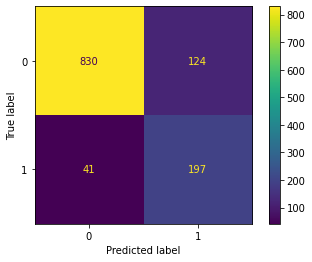

In [28]:
rfc_pipe_combine_tunned.fit(X_train_val, y_train_val)
plot_confusion_matrix(rfc_pipe_combine_tunned , X_test, y_test)


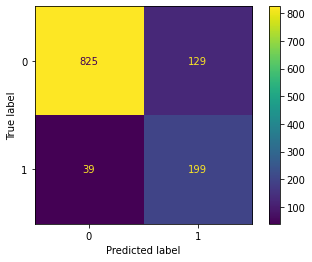

In [29]:
rfc_tuned.fit(X_train_val, y_train_val)
plot_confusion_matrix(rfc_tuned, X_test, y_test)

Berdasarkan confusion table di atas, walaupun recall score semakin membaik tetapi hanya  ada perubahan kecil pada  FN maka  akan dicari "Best Threshold" menggunakan model RandomForest_tunned_rus.

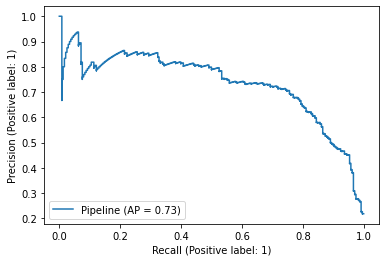

In [30]:
plot_precision_recall_curve(rfc_tuned, X_test, y_test)

In [31]:
p, r, t = precision_recall_curve(y_test, rfc_tuned.predict_proba(X_test)[:,1])
len(p[:-1]), len(r[:-1]), len(t)
pr_df = pd.DataFrame({'precision': p[:-1], 'recall': r[:-1], 'threshold': t})
pr_df

,precision,recall,threshold
0,0.218148,1.000000,0.038083
1,0.217431,0.995798,0.038679
2,0.217631,0.995798,0.038718
3,0.217831,0.995798,0.039464
4,0.218031,0.995798,0.039833
...,...,...,...
1083,0.800000,0.016807,0.979167
1084,0.750000,0.012605,0.980250
1085,0.666667,0.008403,0.982869
1086,1.000000,0.008403,0.983917


In [38]:
pr_df[(pr_df['recall'].between(0.83, 0.95))].tail(40)

,precision,recall,threshold
728,0.567867,0.861345,0.458710
729,0.569444,0.861345,0.460456
730,0.571031,0.861345,0.461196
731,0.572626,0.861345,0.462502
732,0.574230,0.861345,0.465266
733,0.573034,0.857143,0.467512
734,0.574648,0.857143,0.468181
735,0.576271,0.857143,0.469312
736,0.577904,0.857143,0.470040
737,0.579545,0.857143,0.470524


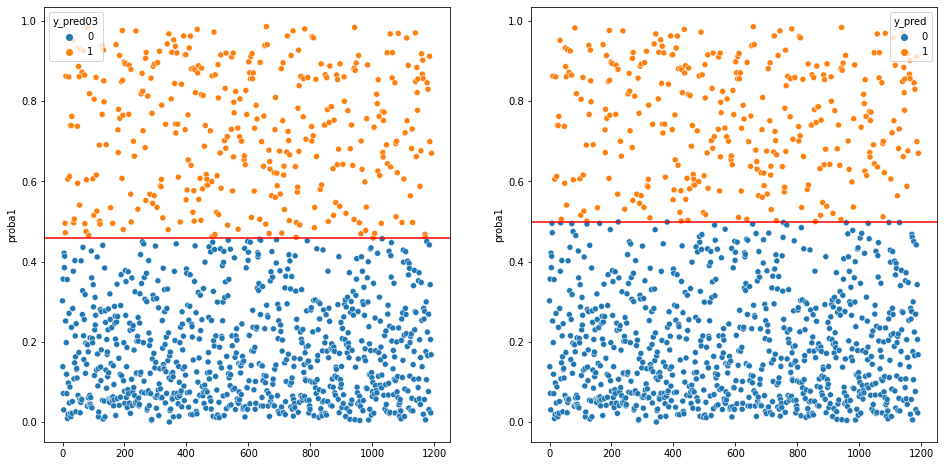

In [39]:
proba1 = rfc_tuned.predict_proba(X_test)[:,1]
y_pred = rfc_tuned.predict(X_test)
thresh = 0.458710
pred_03 = np.where(proba1 > thresh, 1, 0)
res_df = pd.DataFrame({'proba1': proba1, 'y_pred': y_pred, 'y_pred03': pred_03})
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.scatterplot(x=range(len(res_df)), y=res_df['proba1'], hue=res_df['y_pred03'])
plt.axhline(thresh, color='red')

plt.subplot(122)
sns.scatterplot(x=range(len(res_df)), y=res_df['proba1'], hue=res_df['y_pred'])
plt.axhline(0.5, color='red')

Tujuan mencari model machine learning pada kasus ini untuk menyeleksi dan mengklasifikasi secara cepat, tepat,serta akurat pemohon mana saja yang layak mendapatkan pinjaman sehingga meminimalisir kerugian perusahaan yang disebabkan oleh para pemohon yang gagal membayar pinjaman. Oleh karena itu, fokus pada kasus ini adalah meminimalkan False Negative atau menaikkan recall setinggi mungkin dengan Presisi yang masih toleran. Jadi dipilihlah threshold baru yaitu 0.458710

# 5 SAVE MODEL

## PICKLE SAVE

In [40]:
import pickle

In [41]:
rfc_tuned.fit(X,y)
filename = 'rfc_final.sav'
pickle.dump(rfc_tuned, open(filename, 'wb'))

In [3]:
# import pickle

In [374]:
# filename = 'rfc_final.sav'
# loaded_model = pickle.load((open(filename, 'rb')))

In [376]:
# loaded_model